<a href="https://colab.research.google.com/github/karman09/py/blob/master/PV_OLS_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import explained_variance_score , mean_absolute_error , mean_squared_error
from sklearn.metrics import median_absolute_error , r2_score


In [ ]:
veriseti = pd.read_excel('Pv.xlsx','Sayfa1')
print(veriseti.head(15))

    ALT    LAT   SSD     T   GSR  GUC  EKSEN      SONUC
0    50  36.99  7.48  17.7  1.81    1      1   1.716690
1    50  36.99  7.48  17.7  1.81    1      2   2.235164
2    50  36.99  7.48  17.7  1.81    1      3   2.341118
3    50  36.99  7.48  17.7  1.81    3      1   5.150090
4    50  36.99  7.48  17.7  1.81    3      2   6.705519
5    50  36.99  7.48  17.7  1.81    3      3   7.023381
6    50  36.99  7.48  17.7  1.81    5      1   8.583471
7    50  36.99  7.48  17.7  1.81    5      2  11.175848
8    50  36.99  7.48  17.7  1.81    5      3  11.705618
9    50  36.99  7.48  17.7  1.81   10      1  17.166961
10   50  36.99  7.48  17.7  1.81   10      2  22.351721
11   50  36.99  7.48  17.7  1.81   10      3  23.411263
12  690  37.75  8.10  14.8  1.70    1      1   1.607137
13  690  37.75  8.10  14.8  1.70    1      2   2.054073
14  690  37.75  8.10  14.8  1.70    1      3   2.151230


In [ ]:
import re
kayip_veriler = []
sayisal_olmayan_veriler = []

for oznitelik in veriseti:
    # Tüm eşsiz öznitelik  değerleri
    essiz_deger = veriseti[oznitelik].unique()
    print ("'{}' özniteliğine ait essiz(unique) veri sayısı: {}" .format(oznitelik,essiz_deger.size))
    if (essiz_deger.size > 10):
        print("10 adet benzersiz değer listele")
    print (essiz_deger[0:10])
    print ("\n-----------------------------------------------------------------------\n")


'ALT' özniteliğine ait essiz(unique) veri sayısı: 84
10 adet benzersiz değer listele
[  50  690 1253 2173  124  306  995 1227  434  961]

-----------------------------------------------------------------------

'LAT' özniteliğine ait essiz(unique) veri sayısı: 115
10 adet benzersiz değer listele
[36.99 37.75 38.75 39.73 41.07 38.93 38.35 36.5  40.66 36.08]

-----------------------------------------------------------------------

'SSD' özniteliğine ait essiz(unique) veri sayısı: 114
10 adet benzersiz değer listele
[7.48 8.1  6.78 6.36 5.44 7.31 7.58 6.97 7.56 5.73]

-----------------------------------------------------------------------

'T' özniteliğine ait essiz(unique) veri sayısı: 66
10 adet benzersiz değer listele
[17.7 14.8 11.6  6.4 12.9 16.5 10.9 11.3 17.3  9.8]

-----------------------------------------------------------------------

'GSR' özniteliğine ait essiz(unique) veri sayısı: 43
10 adet benzersiz değer listele
[1.81 1.7  1.62 1.52 1.6  1.72 1.67 1.58 1.66 1.3 ]

--------

In [ ]:
if (True in pd.isnull(essiz_deger)):
        s = "{} özniteliğine ait kayıp veri sayısı: {} " .format(oznitelik, pd.isnull(veriseti[oznitelik]).sum())
        kayip_veriler.append(s)

In [ ]:
for i in range (1, np.prod(essiz_deger.shape)):
        if (re.match('nan', str(essiz_deger[i]))):
            break
        if not (re.search('(^\d+\.?\d*$)|(^\d*\.?\d+$)', str(essiz_deger[i]))):
            sayisal_olmayan_veriler.append(oznitelik)
            break

In [ ]:
print ("Kayıp veriye sahip öznitelikler:\n{}\n\n" .format(kayip_veriler))
print ("Sayısal olmayan veriye sahip öznitelikler:\n{}" .format(sayisal_olmayan_veriler))

Kayıp veriye sahip öznitelikler:
[]


Sayısal olmayan veriye sahip öznitelikler:
[]


In [ ]:
#Liste 9.4
X = veriseti.iloc[:, :-1].values
y = veriseti.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
#Liste 9.5
#Bağımsız değişkenlere ait tanımlayıcı İstatistik bilgileri
print(stats.describe(X_train,axis=0))
print(np.std(X_train,axis=0))
print(stats.describe(X_test,axis=0))
print(np.std(X_test,axis=0))
#Bağımlı değişkene ait tanımlayıcı İstatistik verileri
print(stats.describe(y_train,axis=0))
print(np.std(y_train,axis=0))
print(stats.describe(y_test,axis=0))
print(np.std(y_test,axis=0))

DescribeResult(nobs=1134, minmax=(array([ 0.  , 33.55,  3.83,  6.  ,  1.3 ,  1.  ,  1.  ]), array([2.173e+03, 4.203e+01, 8.430e+00, 1.850e+01, 2.050e+00, 1.000e+01,
       3.000e+00])), mean=array([864.45590829,  38.86109347,   6.92468254,  12.87089947,
         1.62258377,   4.78130511,   1.99118166]), variance=array([3.33497795e+05, 2.56212978e+00, 9.40639749e-01, 1.10299203e+01,
       1.80823738e-02, 1.12425099e+01, 6.67177243e-01]), skewness=array([ 0.40244865, -0.19448023, -0.88108558, -0.14220644,  0.09660695,
        0.56970052,  0.01620064]), kurtosis=array([-0.60771229, -0.22521586,  0.26333809, -0.90106345,  0.06410641,
       -1.09076682, -1.49965005]))
[5.77237997e+02 1.59995950e+00 9.69438116e-01 3.31966771e+00
 1.34411414e-01 3.35150650e+00 8.16448960e-01]
DescribeResult(nobs=486, minmax=(array([ 0.  , 33.55,  3.83,  6.  ,  1.3 ,  1.  ,  1.  ]), array([2.173e+03, 4.203e+01, 8.430e+00, 1.850e+01, 2.050e+00, 1.000e+01,
       3.000e+00])), mean=array([888.42592593,  38.955

In [ ]:
#Liste 9.6
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
y_train=scaler.fit_transform(y_train.reshape(-1,1))
y_test=scaler.fit_transform(y_test.reshape(-1,1))

In [ ]:
#Liste 9.7
from sklearn.linear_model import LinearRegression
model_Regresyon  = LinearRegression()
model_Regresyon.fit(X_train, y_train)
y_pred_test = model_Regresyon.predict(X_test)

In [ ]:
y_pred_train=model_Regresyon.predict(X_train)

In [ ]:
#Liste 9.8
import statsmodels.api as sm
X = np.append(arr = np.ones((1620,1)).astype(int), values = X, axis = 1)
veriseti.columns

Index(['ALT', 'LAT', 'SSD', 'T', 'GSR', 'GUC', 'EKSEN', 'SONUC'], dtype='object')

In [ ]:
#Liste 9.9
X_yeni = X[:, [0,1,2,3,4,5,6,7]]
model_regresyon_OLS = sm.OLS(endog=y, exog=X_yeni).fit()
model_regresyon_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     6600.
Date:                Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:52:53   Log-Likelihood:                -2579.5
No. Observations:                1620   AIC:                             5175.
Df Residuals:                    1612   BIC:                             5218.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.5192      2.914     -6.013      0.000     -23.234     -11.804
x1             0.0004      0.000      2.652      0.008       0.000       0.001
x2             0.1662      0.053      3.130      0.002       0.062       0.270
x3            -0.1098      0.052     -2.104      0.036      -0.212      -0.007
x4             0.0544      0.034      1.595      0.111      -0.013       0.121
x5             5.0869      0.445     11.433      0.000       4.214       5.960
x6             1.8728      0.009    211.472      0.000       1.855       1.890
x7             1.2456      0.036     34.335      0.000       1.174       1.317
==============================================================================
Omnibus:                       55.010   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.055
Skew:                           0.105   Prob(JB):                     1.05e-30
Kurtosis:                       4.415   Cond. No.                     1.04e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Liste 9.10
X_opt = X[:, [0,1,2,3,5,6,7]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     7692.
Date:                Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:52:53   Log-Likelihood:                -2580.8
No. Observations:                1620   AIC:                             5176.
Df Residuals:                    1613   BIC:                             5213.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.6569      2.296     -6.384      0.000     -19.160     -10.153
x1             0.0002   5.13e-05      3.734      0.000    9.08e-05       0.000
x2             0.1133      0.041      2.732      0.006       0.032       0.195
x3            -0.0923      0.051     -1.808      0.071      -0.192       0.008
x4             5.0828      0.445     11.419      0.000       4.210       5.956
x5             1.8729      0.009    211.372      0.000       1.855       1.890
x6             1.2457      0.036     34.319      0.000       1.174       1.317
==============================================================================
Omnibus:                       54.238   Durbin-Watson:                   1.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.948
Skew:                           0.098   Prob(JB):                     3.01e-30
Kurtosis:                       4.406   Cond. No.                     8.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Liste 9.11
X_opt = X[:, [0,1,2,5,6,7]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     9217.
Date:                Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:52:53   Log-Likelihood:                -2582.5
No. Observations:                1620   AIC:                             5177.
Df Residuals:                    1614   BIC:                             5209.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.3960      2.086     -7.859      0.000     -20.488     -12.304
x1             0.0002   5.12e-05      3.850      0.000    9.67e-05       0.000
x2             0.1475      0.037      3.990      0.000       0.075       0.220
x3             4.9392      0.438     11.269      0.000       4.079       5.799
x4             1.8729      0.009    211.228      0.000       1.855       1.890
x5             1.2458      0.036     34.298      0.000       1.175       1.317
==============================================================================
Omnibus:                       57.253   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.682
Skew:                           0.114   Prob(JB):                     2.32e-32
Kurtosis:                       4.451   Cond. No.                     7.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Liste 9.12
# Test veri seti performansı
print("MAE=%0.2f"%mean_absolute_error(y_test,y_pred))
print("MSE=%0.2f"%mean_squared_error(y_test,y_pred))
print("MedAE=%0.2f"%median_absolute_error(y_test,y_pred))
print("Belirleme Katsayısı(R2)=%0.2f"%r2_score(y_test,y_pred))
print("RMSE=%0.2f"%np.sqrt(mean_squared_error(y_test,y_pred)))

#inverse transform MLR
unscaled_y_test=scaler.inverse_transform(y_test.reshape(-1,1))
unscaled_y_pred=scaler.inverse_transform(y_pred.reshape(-1,1))
print(unscaled_y_test)
print(unscaled_y_pred)

MAE=0.04
MSE=0.00
MedAE=0.03
Belirleme Katsayısı(R2)=0.96
RMSE=0.05
[[ 6.0340973 ]
 [17.93837818]
 [ 7.08989258]
 [16.31779786]
 [ 1.7344283 ]
 [20.44609871]
 [ 7.51346937]
 [ 5.75933329]
 [ 1.6045231 ]
 [ 4.86594147]
 [ 1.68767712]
 [16.27552552]
 [14.155125  ]
 [ 6.80128769]
 [ 6.77988479]
 [17.72290292]
 [21.02662679]
 [ 5.46462162]
 [ 1.97801141]
 [21.70808028]
 [ 8.14156803]
 [ 6.42143941]
 [11.2891702 ]
 [10.44119472]
 [ 8.37797782]
 [ 4.77636871]
 [ 7.05092195]
 [ 2.0703227 ]
 [ 6.64132073]
 [20.02075047]
 [ 1.81820208]
 [ 2.20179786]
 [ 2.37319008]
 [ 4.26161718]
 [10.58265821]
 [ 6.18171745]
 [15.4494432 ]
 [20.98424433]
 [ 8.03570557]
 [ 8.4646    ]
 [ 6.7709821 ]
 [ 6.00542382]
 [ 2.10196235]
 [ 2.15712968]
 [ 8.60488346]
 [ 2.16966233]
 [ 6.0879645 ]
 [10.35163708]
 [ 1.59289528]
 [10.00372385]
 [ 2.10755301]
 [ 2.15123032]
 [ 4.80676783]
 [14.41150718]
 [ 6.62494116]
 [ 1.70781397]
 [16.41655749]
 [ 4.92094969]
 [ 9.40318399]
 [21.14981934]
 [ 1.64349257]
 [ 1.41550766]
 [

In [ ]:
#Liste 9.12
# Test veri seti performansı
print("MAE=%0.2f"%mean_absolute_error(y_test,y_pred))
print("MSE=%0.2f"%mean_squared_error(y_test,y_pred))
print("MedAE=%0.2f"%median_absolute_error(y_test,y_pred))
print("Belirleme Katsayısı(R2)=%0.2f"%r2_score(y_test,y_pred))
print("RMSE=%0.2f"%np.sqrt(mean_squared_error(y_test,y_pred)))

MAE=0.04
MSE=0.00
MedAE=0.03
Belirleme Katsayısı(R2)=0.96
RMSE=0.05


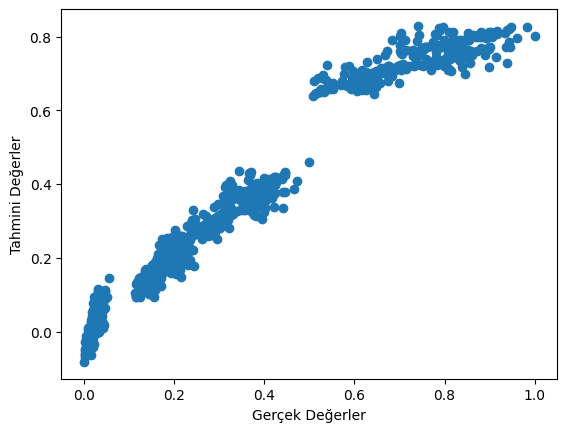

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred_train)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmini Değerler')
plt.show()

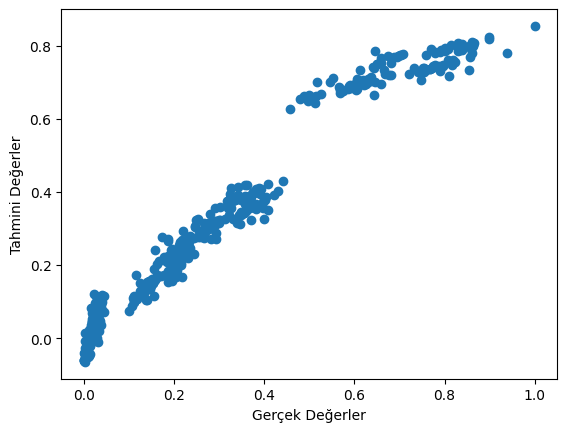

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_test)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmini Değerler')
plt.show()

In [ ]:
score1 = pd.DataFrame({'Actual Value': y_test.flatten(), 'Predicted value': y_pred_test.flatten(), 'Difference': y_test.flatten() - y_pred_test.flatten()})
score1[0:500]


,Actual Value,Predicted value,Difference
0,0.188740,0.177226,0.011514
1,0.667824,0.723199,-0.055375
2,0.231231,0.234224,-0.002993
3,0.602604,0.679775,-0.077170
4,0.015702,0.002242,0.013459
...,...,...,...
481,0.645219,0.785765,-0.140546
482,0.030933,0.037710,-0.006778
483,0.279556,0.339759,-0.060203
484,0.429610,0.403774,0.025836
